<a href="https://colab.research.google.com/github/JunyuYan/Pytorch-Learning-Materials/blob/main/pytorch_official/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The commonly used training method for neural networks is back propagation. In this algorithm, parameters (model's weight) are adjusted according to the gradient of the loss function with respect to the given parameter.

Pytorch privides a built-in differentiation engine called ***torch.autograd***. It supports the automatic computation of gradient for any computation graph.

**Topic 1: Tensors, Functions and Computational graph**

Take the following computational graph as an example:
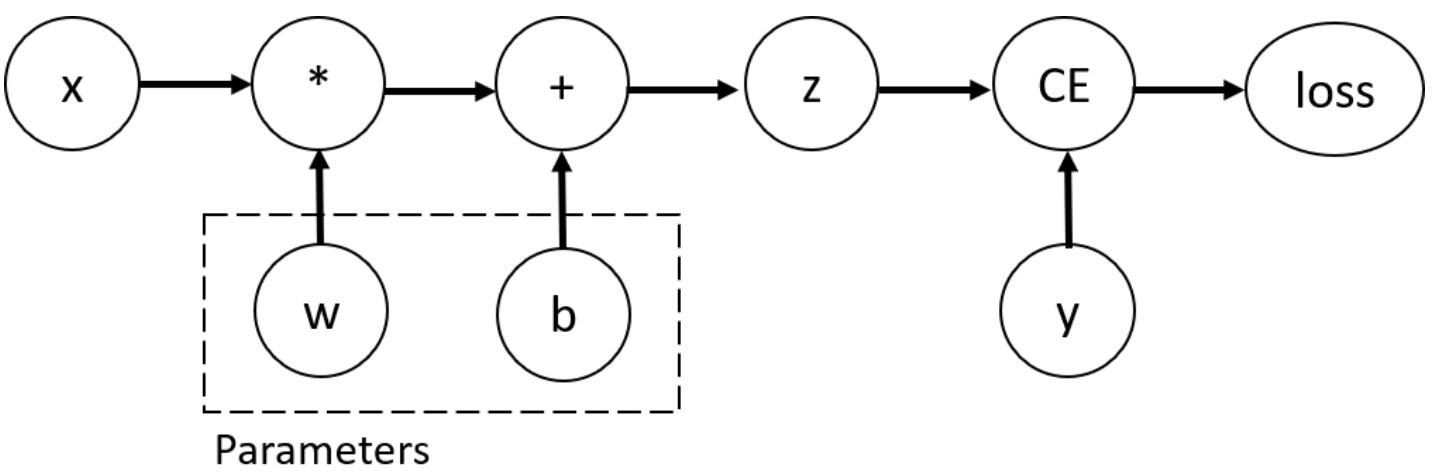

In this network, ``w`` and ``b`` are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the ``requires_grad`` property of those tensors.

In [4]:
# Code for the above computaional graph
import torch

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

Note: the ``requires_grad`` can be set when creating the tensor, or later by using ``x.requires_grad_(True)`` method.

A function that we apply to tensors to construct computational graph is
in fact an object of class ``Function``. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in ``grad_fn`` property of a
tensor.

In [5]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7c5167c93910>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7c5167c92710>


**Topic 2: Compute Gradients**

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:

In [6]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0230, 0.0747, 0.2623],
        [0.0230, 0.0747, 0.2623],
        [0.0230, 0.0747, 0.2623],
        [0.0230, 0.0747, 0.2623],
        [0.0230, 0.0747, 0.2623]])
tensor([0.0230, 0.0747, 0.2623])


Note: We can only obtain the *grad* properties for the leaf nodes of the computation graph, which have ``requires_grad`` property set to ``True``. For all other nodes in the computation graph, the gradients are not available.

**Topic 3: Disabling Gradient Tracking**

Sometimes we only need the forward computations and disable gradient tracking, i.e. during test process. To achieve this, we can use ``torch.no_grad()`` block or ``detach()`` method.

In [7]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [8]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network as **frozen parameters**.
  - To **speed up computations** when you are only doing forward pass, because computations on tensors that do
    not track gradients would be more efficient.